# Seaborn.

## Introdução    

A ideia principal do Seaborn é fornecer comandos de alto nível comparativamente ao matplotlib, de modo que vamos conseguir criar uma variedade de tipos de gráficos úteis para análise exploratória e estatística dos dados.

Veremos abaixo alguns dos datasets e tipos de gráficos disponíveis no Seaborn.


Os gráficos que veremos a seguir também podem ser construídos com funções do Matplotlib (é isso que o Seaborn faz por trás dele), mas a API do Seaborn é muito mais amigável.

- [seaborn: statistical data visualization](https://seaborn.pydata.org/)

## Dataset

Nos exemplos a seguir, usaremos os seguintes datasets:

* Dados gerados a partir da distribuição normal multivariada

* O dataset `tips` disponível na biblioteca seaborn, que possui dados de gorjeta de um restaurante

- [mwaskom/seaborn-data](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv)

* O dataset `planets` disponível na biblioteca seaborn, que possui dados sobre o descobrimento de planetas

- [mwaskom/seaborn-data/planets.csv](https://github.com/mwaskom/seaborn-data/blob/master/planets.csv)


In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size = 2000)
data = pd.DataFrame(data, columns = ['x', 'y'])

data_tips = sns.load_dataset('tips')
#data_tips.head()

data_planets = sns.load_dataset('planets')
data_planets.head()

C:\Users\UESLLEI\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [2]:
data_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
data_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## `kdeplot`

- [`seaborn.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

Como alternativa aos histogramas do matplotlib, podemos obter uma estimativa uniforme da distribuição usando uma estimativa de densidade kernel, para tanto o seaborn possui a seguinte função `sns.kdeplot`:

In [7]:
data.head()

,x,y
0,-0.048404,-0.877131
1,0.678079,-0.905481
2,-2.382166,0.400346
3,1.853630,2.075058
4,-0.149967,0.068623


C:\Users\UESLLEI\AppData\Local\Temp\ipykernel_16120\3223483459.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\UESLLEI\AppData\Local\Temp\ipykernel_16120\3223483459.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


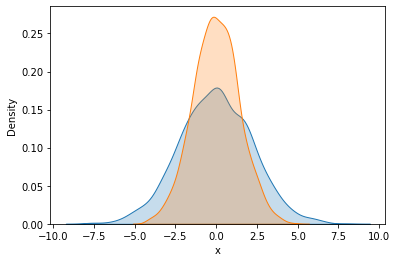

In [5]:
for col in data.columns:
    sns.kdeplot(data[col], shade=True)

Podemos combinar histogramas e kdeplot com o método `sns.distplot`:

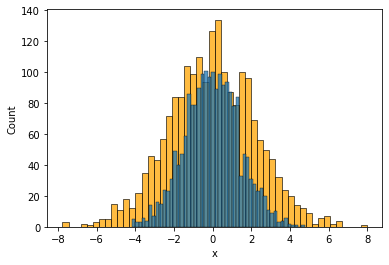

In [9]:
sns.histplot(data['x'], color = "orange", bins = 50)
sns.histplot(data['y'], bins = 50);

`sns.kdeplot` e `sns.histplot` recebem como parâmetro um conjunto de dados unidimensional.

## `jointplot`

- [`seaborn.jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

Podemos ver a distribuição conjunta juntamente com as distribuições marginais usando `sns.jointplot`.

Faremos um gráfico de densidade kernel dos dados, definindo o valor do argumento kind como kde.

`sns.jointplot` recebe como parâmetros os dados a serem plotados nos eixos x e y, ou os nomes das colunas do conjunto de dados e o conjunto de dados cujas colunas serão representadas nos eixos x e y

Para este gráficos, definimos o estilo de fundo branco:

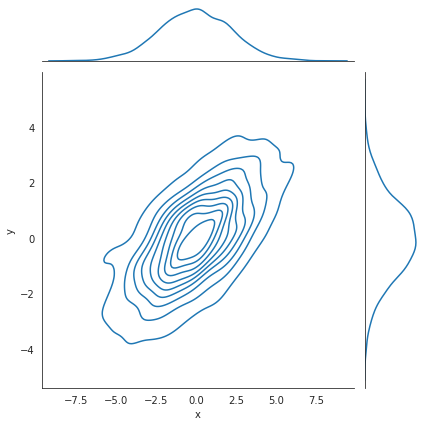

In [10]:
with sns.axes_style('white'):
    sns.jointplot(x = "x", y = "y", data = data, kind = 'kde');

Outra alternativa:

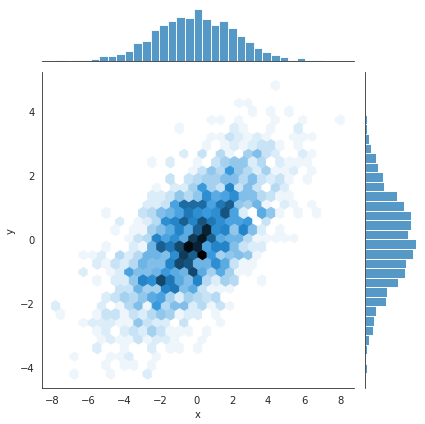

In [11]:
with sns.axes_style('white'):
    sns.jointplot(x = "x", y = "y", data = data, kind = 'hex')

## `pairplot`

- [`seaborn.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Esses gráficos são muito úteis para explorar correlações entre dados multidimensionais, plotando todos os pares de valores uns contra os outros.

In [13]:
data_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


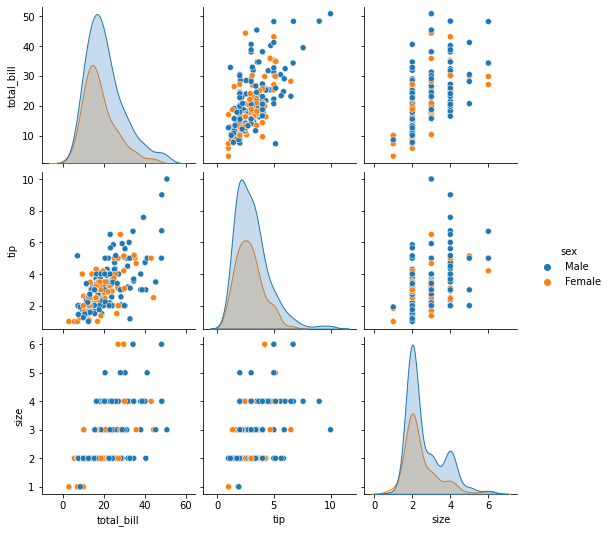

In [12]:
# Auxilia a observação da correlação das features
sns.pairplot(data_tips, hue = 'sex', height = 2.5); 

## `FacetGrid`

- [`seaborn.FacetGrid()`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

Às vezes, a melhor maneira de visualizar os dados é por meio de subconjuntos de histogramas.

Veremos neste exemplo a quantidade de gorjetas recebidas pelos funcionários do restaurante com base em diferentes indicadores.

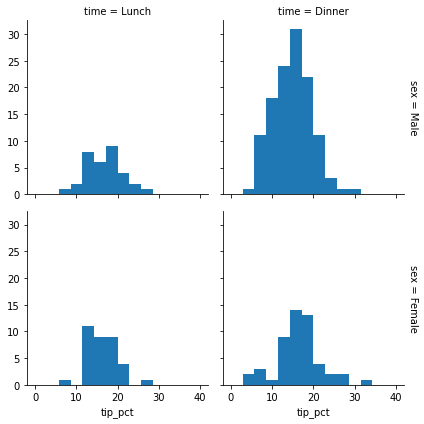

In [14]:
import matplotlib.pyplot as plt

# calculamos qual porcentagem da conta representa a gorjeta:
data_tips['tip_pct'] = 100 * data_tips['tip'] / data_tips['total_bill']

# criamos um grid vazio
grid = sns.FacetGrid(data_tips, row = "sex", col = "time", margin_titles = True)

# representamos graficamente cada um dos histogramas que correspondem aos elementos do grid:
# nota: plt.hist é um método do matplotlib

grid.map(plt.hist, "tip_pct", bins = np.linspace(0, 40, 15));

## `catplot`

- [`seaborn.catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html)

Esses gráficos nos permitem ver a distribuição de uma variável numérica dentro das categorias definidas por qualquer outro parâmetro.

`catplot` define uma família de gráficos, o valor especificado no parâmetro `kind` define que tipo de gráfico será construído.

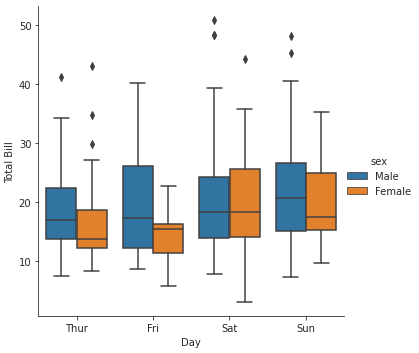

In [15]:
with sns.axes_style(style = 'ticks'):
    g = sns.catplot(x = "day", 
                    y = "total_bill", 
                    hue = "sex", 
                    data = data_tips, 
                    kind = "box"
                   )
    
    #g
    g.set_axis_labels("Day", "Total Bill");

Podemos usar o método `catplot` para gerar um gráfico de barras:

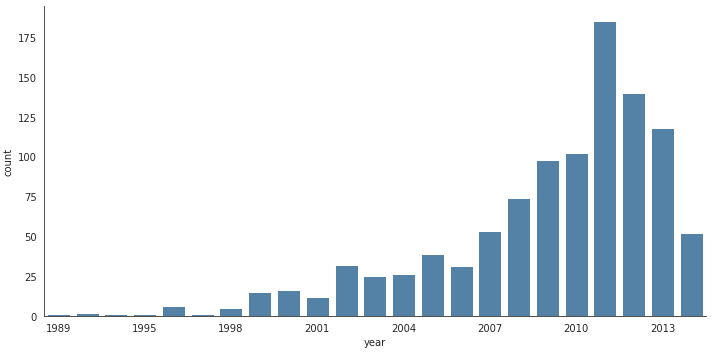

In [16]:
with sns.axes_style('white'):
    g = sns.catplot(x = "year", 
                    data = data_planets, 
                    aspect = 2, 
                    kind = "count", 
                    color = 'steelblue'
                   )
    
    
    g.set_xticklabels(step = 3)

Vamos agora olhar para a coluna *method* do dataset planets, que possui informações sobre o descobrimento de cada um dos planetas

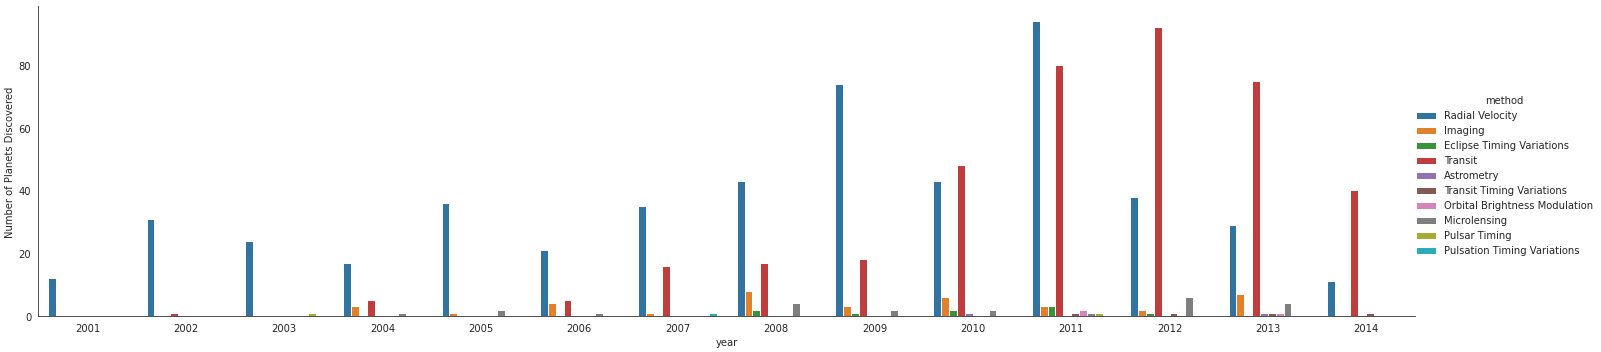

In [17]:
with sns.axes_style('white'):
    g = sns.catplot(x = "year", 
                    data = data_planets, 
                    aspect = 4.0, 
                    kind = 'count',
                    hue = 'method', 
                    order = range(2001, 2015)
                   )
    
    g.set_ylabels('Number of Planets Discovered')

---
#### Referências

Python Data Science Handbook. Jake VanderPlas. 2017. Capítulo 4.

Código do livro (pode ser executado no Colab): 

- [jakevdp/PythonDataScienceHandbook](https://github.com/jakevdp/PythonDataScienceHandbook)

Tutorial: 

- [User guide and tutorial](http://seaborn.pydata.org/tutorial.html)

Exemplos de código

- [Example gallery](https://seaborn.pydata.org/examples/index.html)
